# Большая лабораторная работа. Intelligent placer

* [Описание алгоритма](#Описание-алгоритма)

* [Реализация](#Реализация)

* [Запуск из консоли](#Запуск-из-консоли )

* [Обработка ошибок](#Обработка-ошибок)

* [Метрики качества работы алгоритма](#Метрики-качества-работы-алгоритма)

В рамках большой лабораторной работы предлагается разработать Intelligent placer - программу, которая на вход будет принимать изображение предметов и многоугольника, а результатом ее работы будет ответ могут ли предметы с изображения поместиться в многоугольнике.

Для реализации была выбрана следующая постановка задачи: необходимо расположить все предметы, которые есть на изображении в многоугольник, параллельным переносом без поворота.

## Описание алгоритма

1. С помощью функции алгоритма Кенни canny и функции нахождения контура findContours пакета cv2 находятся контуры предметов изображения (включая многоугольник).
2. Для удобства параллельного переноса найденные контуры аппроксимируются, т. е. на выходе получаем массив точек, по которым можно построить контур предмета.
3. Разделение полученного набора объектов на фигуру и предметы. Фигурой считается тот предмет, который имеет наименьшую координату по оси x.
4. Если в ходе первых трех пунктов произошла ошибка, то алгоритм останавливается с соотвествующим сообщением об ошибке.
5. Для всех перестановок из найденных предметов запускается алгоритм для проверки расположения данной перестановки предметов в многоугольнике. Для каждой фигуры из текущей перестановки выполняется следующий алгоритм:
    * Находим крайние точки (левая, правая, верхняя и нижняя) для предмета и для фигуры
    * Находим разность крайней правой и крайней левой точек предмета и сравниваем ее с разностью крайней правой и крайней левой точкек фигуры. Если для предмета данная разность больше, чем для фигуры, то алгоритм возвращает False, т. е. данный предмет нельзя разместить в фигуре и остальные предметы уже не будут проверяться. Аналогично проверяются крайние верхняя и нижняя точки.
    * Переносим предмет параллельным переносом на расстояние: разность крайней левой точки предмета и крайней левой точки фигуры  влево и разность крайней верхней точки предмета и и крайней верхней точки фигуры вверх.
    * Двигаем предмет вдоль оси x вправо на один пиксель пока координата крайней правой точки предмета меньше, чем крайняя правая координата фигуры, перед сдвигом проверяем следующие пункты:
        * Все точки предмета должны находиться внутри предмета
        * Предмет не может находиться внутри другого уже расположенного предмета
        * Предмет не должен пересекаться с другими уже расположенными предметами
    * Если хоть один из данных пунктов не выполнен, тогда происходит сдвиг на один пиксель вниз по оси y, а по оси x предмет сдвигается в крайнуюю левую точку фигуры. И повторяется предыдущий пункт, пока крайняя нижняя точка предмета меньше крайней нижней точки фигуры. Иначе возвращается значение True и координаты расположения предмета в фигуре.
    * Если при проходе через все точки фигуры не было найдено расположение предмета, тогда возвращается False.
6. Если найдено расположение всех предметов в фигуре, тогда возвращается True и сохраняется изображение, на котором отмечены исходные контуры предметов, контур фигуры и контуры предметов в фигуре. Иначе возвращается False и сохраняется изображение, на котором отмечены исходные контуры предметов и контур фигуры. В названии изображения указывается название исходного изображения и результат работы алгоритма.

## Реализация

Загружаем изображение

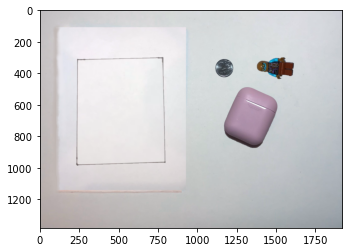

In [5]:
image = cv2.imread('images/ds1.png')
plt.imshow(image)

Находим контуры объектов и разделяем их на предметы и фигуры

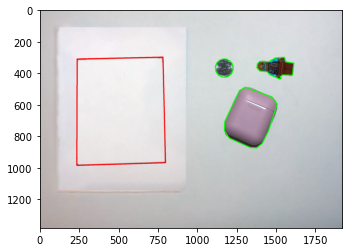

In [6]:
objects_contours = get_objects_contours(image)
figure, objects = classify_objects(objects_contours)

draw_contour(image, figure, (255, 0, 0))
for object_ in objects:
    draw_contour(image, object_, (0, 255, 0))
plt.imshow(image)    

Запускаем функцию placed_all, которая находит расположение всех предметов в фигуре

In [13]:
placed, placed_objects = placed_all(figure, objects, image.copy())
placed

True

Нарисуем полученные контуры

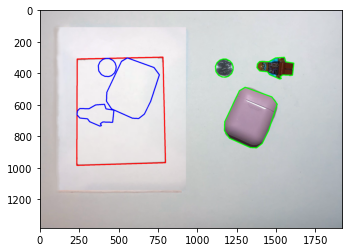

In [16]:
for object_ in placed_objects:
    draw_contour(image, object_, (0, 0, 255))
plt.imshow(image)    

## Запуск из консоли 

Приложение можно запускать из консоли. Для этого необходимо перейти в директорию проекта и в консоли выполнить команду
        
        python main.py --image 'images\m1.png'

где параметр --image указывает путь до изображения

## Обработка ошибок

Вводятся следующие виды ошибок:
* Ошибка системных аргументов: неверное количество аргументов из консоли, неверное имя аргумента из консоли
* Ошибка чтения файла: указанного файла не существует, указанный файл невозможно прочитать
* Ошибка данных: неверное количество вершин многоугольника, нет предметов на фотографии

Примеры ответа приложения для ошибочных запусков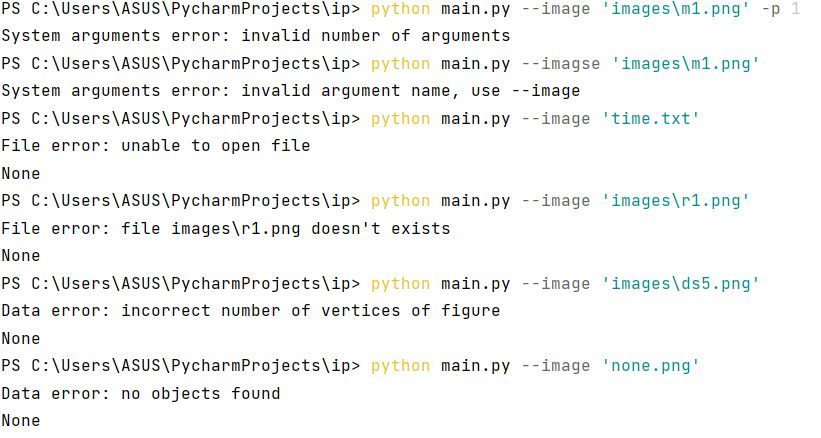

## Метрики качества работы алгоритма

### Работа алгоритма для различного расположения одного набора данных

Допустим есть набор предметов, который абсолютно точно можно расположить в заданном многоугольнике. Проверим, что независимо от расположения этих объектов на изображении алгоритм выдаст правильный результат.

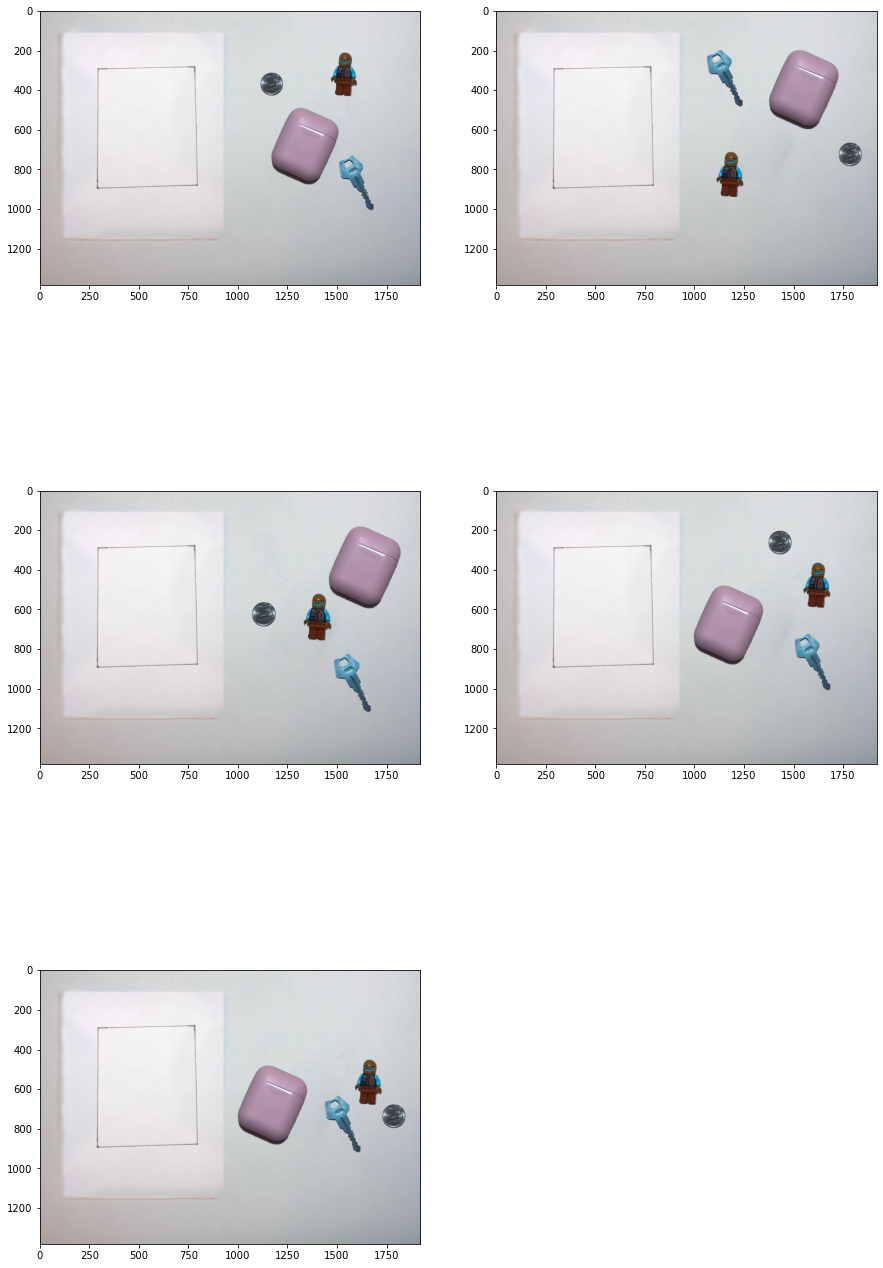

In [54]:
images = []
for i in range(5):
    images.append(cv2.imread('images/p' + str(i + 1) + '.png'))

plt.figure(figsize=(15, 25)) 
for i in range(len(images)):
    plt.subplot(3, 2, i + 1)
    plt.imshow(images[i])

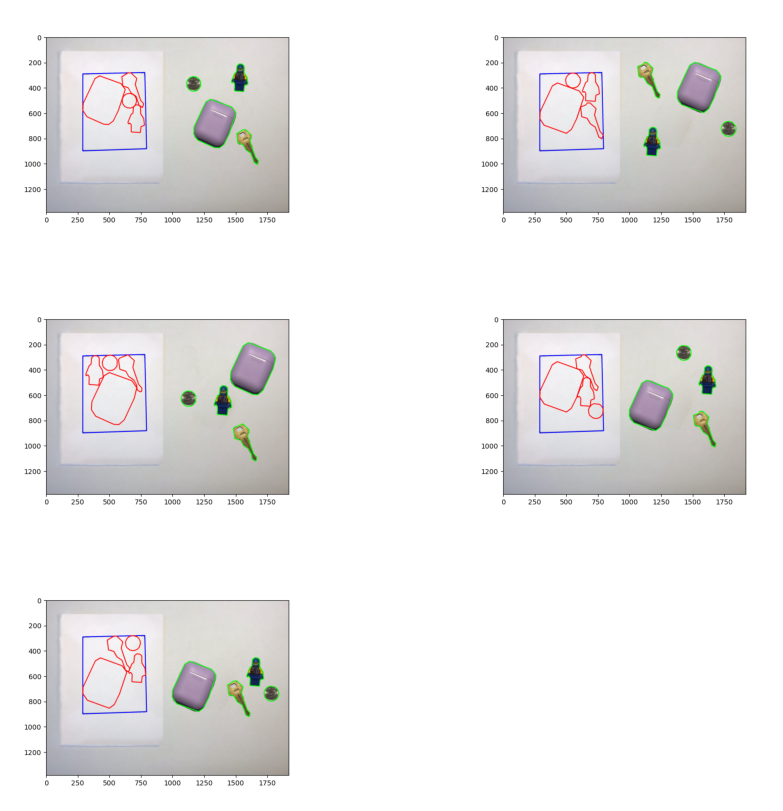

In [74]:
plt.figure(figsize=(15, 25)) 
for i in range(len(images)):
    plt.subplot(5, 2, i + 1)
    placed = intelligent_placer(images[i], 'p' + str(i + 1) + '.png', 'result/')

### Зависимость времени алгоритма от количества предметов 

Возьмем идентичные предметы, прогоним алгоритм для разного количества этих предметов. И построим зависимость времени работы алгоритма от количества предметов.

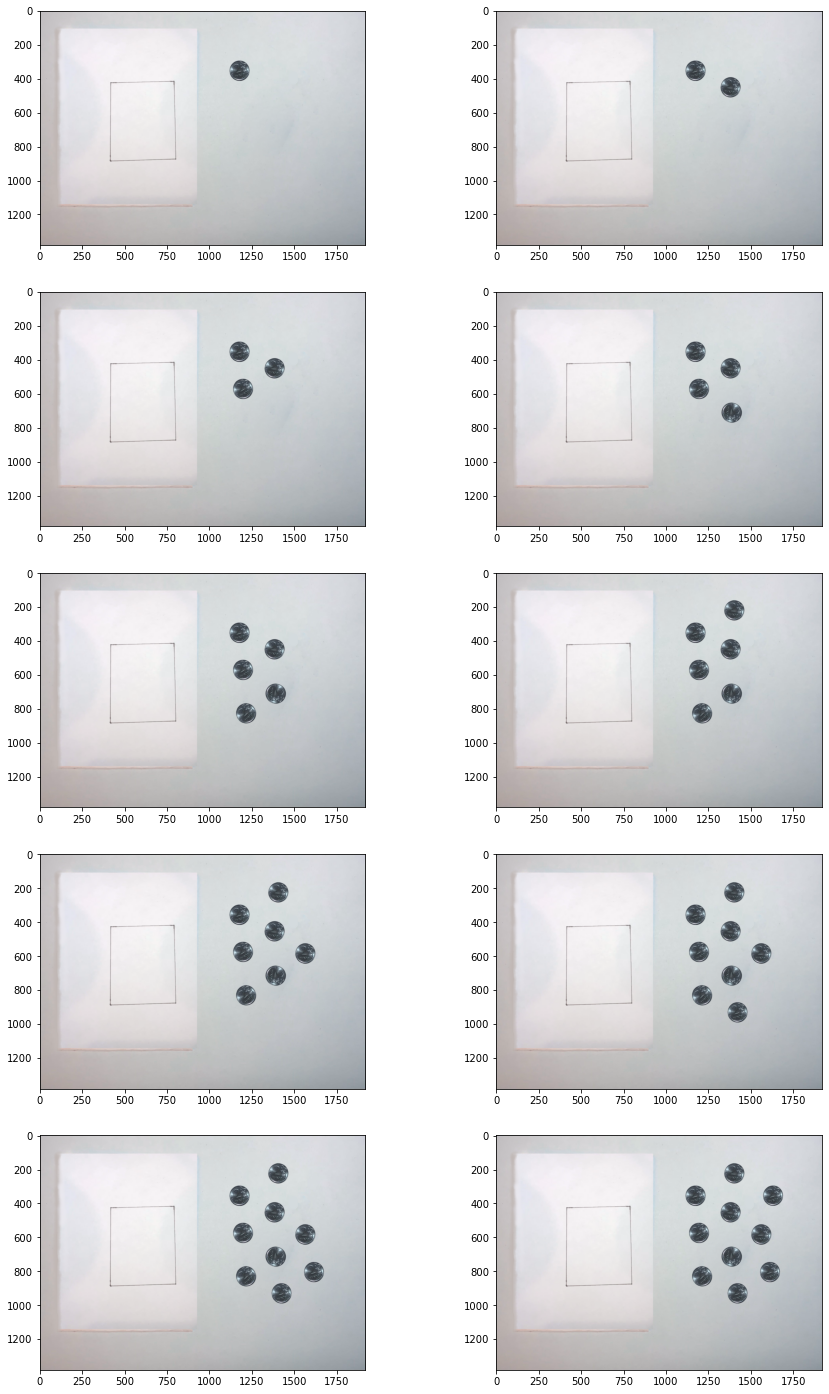

In [75]:
images = []
for i in range(10):
    images.append(cv2.imread('images/m' + str(i + 1) + '.png'))

plt.figure(figsize=(15, 25)) 
for i in range(len(images)):
    plt.subplot(5, 2, i + 1)
    plt.imshow(images[i])

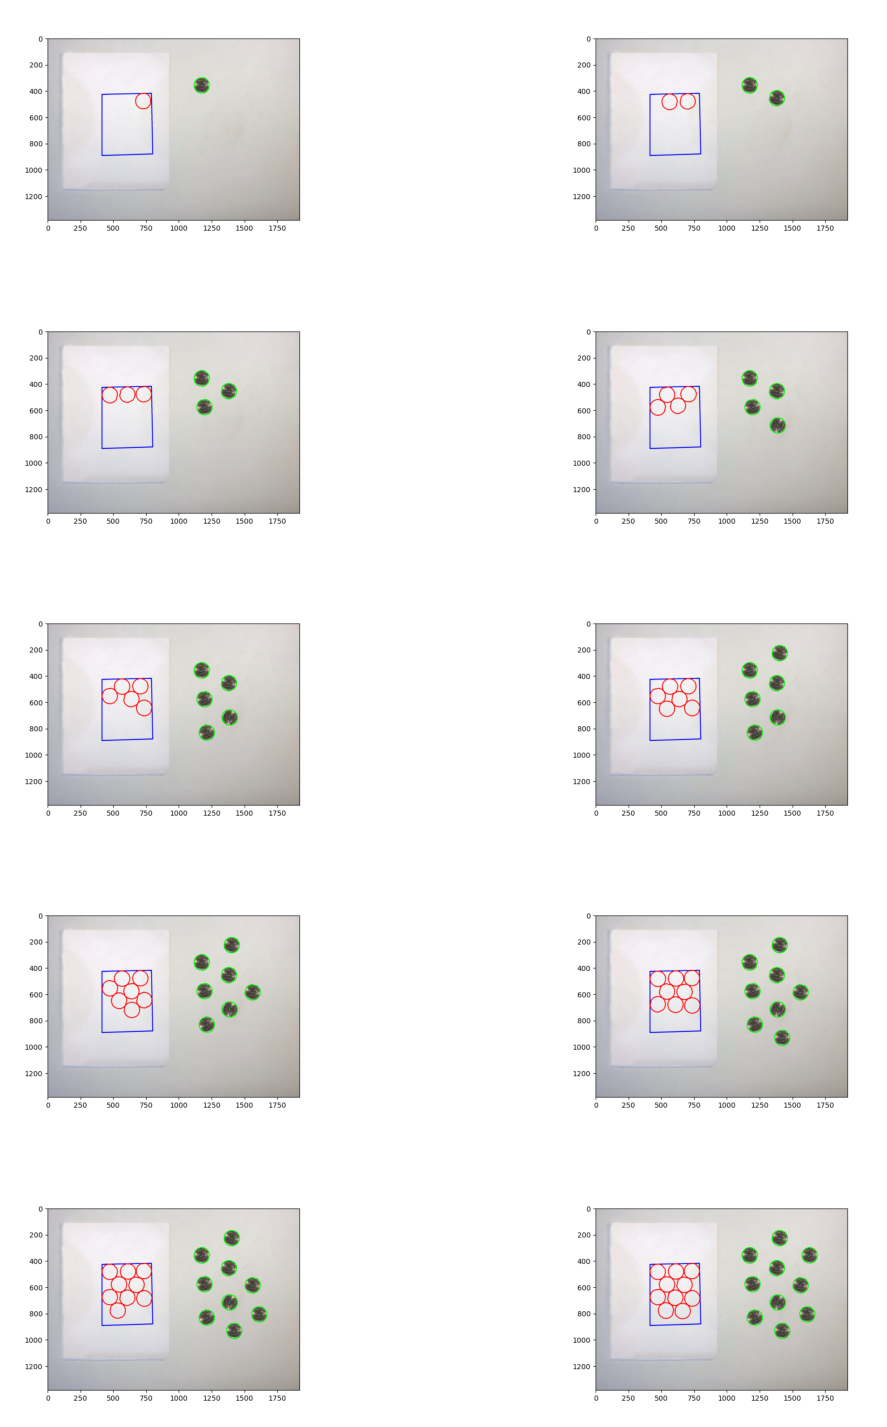

In [76]:
plt.figure(figsize=(18, 26)) 
for i in range(len(images)):
    plt.subplot(5, 2, i + 1)
    placed = intelligent_placer(images[i], 'm' + str(i + 1) + '.png', 'result/')

График зависимости времени работы алгоритма от количества предметов на изображении!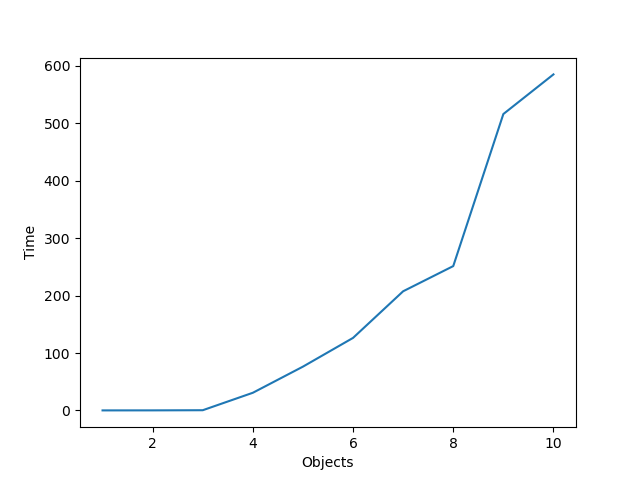